# Creditcardfraude detecteren

## Introductie
Creditcard fraude wordt door criminele organisaties op grote schaal toegepast met grote financiële schade tot gevolg. In Groot-Britannië was de schade door creditcard fraude in 2007 geschat op 600 miljoen euro per jaar. 

Contant geld wordt minder gebruikt en we stappen massaal over naar ‘plastic’ geld, de Nederlanders voorop. Het aantal te monitoren betaaltransacties loopt hierdoor ook op. Daarom zijn systemen die deze transacties monitoren essentieel. Gelukkig worden steeds slimmer en beter, maar een waterdichte oplossing voor het klassieke creditcard fraude probleem is er nog niet. Op basis van een dataset van ongeveer 285.000 transacties hebben we een algoritme gebouwd dat --,-% van alle frauduleuze transacties eruit haalt met een precisie van --,-%. Wat dat exact betekent, lees je hier beneden.

## De case study
Zoals aangegeven gebruiken we voor deze case study een dataset met bijna 285.000 transacties. Hoewel het een aardige hoeveelheid data is om een analyse op uit te voeren, ligt de moeilijkheid in de onbalans van de dataset. Onbalans betekent dat er tussen de 285.000 transacties slechts 492 frauduleuze transacties zitten. Dit komt neer op slechts 0.17%. 

Waarom leidt dit tot moeilijkheden? Omdat een algoritme standaard wordt beoordeeld op hoe vaak het input goed classificeert. Dat werkt in dit geval helaas niet. Wanneer het algoritme namelijk elke transactie als niet-frauduleus classificeert, behaalt het een nauwkeurigheid van 99,83% (100% - 0,17%)! Dit klinkt geweldig, maar je hebt geen enkele frauduleuze transactie herkent. In deze case hebben we daarom een aantal technieken gecombineerd om tot het optimale resultaat te komen.

Deze case study is opgebouwd in secties en volgt - waar mogelijk - ons 7-stappenplan:
1. Plan van aanpak 
2. Data analyse
3. Data cleaning / processing
4. Prototype model
5. Optimaal model

Het verwerken van de data en het bouwen van het model gebeurt volledig in Python.

## Plan van aanpak

Hoewel het bouwen van een goed algoritme een proces van trial en error is, is het goed om vooraf vast te stellen wat we op willen lossen en hoe we dit aan gaan pakken.

We willen in deze cause frauduleuze transacties herkennen door middel van een algoritme. De business case hierachter is niet bekend, maar kan zijn dat het wellicht te duur is om dit door mensen te laten doen of dat men de inschatting maakt dat een algoritme consistent betere resultaten kan behalen.

Om een algoritme goed te kunnen laten functioneren, moeten we om weten te gaan met de onbalans in de data. Hiervoor gebruiken we de volgende twee technieken:
1. Undersampling
2. Oversampling

Om de patronen in de data te herkennen en daarmee dus ook de frauduleuze transacties, bouwen we een aantal neurale netwerken. We experimenteren met verschillende lagen, vormen en zelfs met meerdere netwerken die functioneren als één groot netwerk.

De maatstaf waarmee we de prestatie van ons neuraal netwerk meten is de zogenaamde Area Under the Curve (AUC). Deze maatstaf is uitermate geschikt voor algoritmes voor binaire classificaties, gebouwd op ongebalanceerde datasets. In de sectie *Prototype model* gaan we hier dieper op in.

Maar laten we beginnen met het analyseren van de data om voor onszelf en de stakeholders inzichtelijk te maken waar we nu eigenlijk mee gaan werken.

## Data analyse

De dataset voor deze case study is een __[openbare dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud)__, bestaande uit 284.807 creditcardtransacties. Hiervan zijn 492 transacties frauduleus. De data is verzameld over een periode van twee dagen. Om privacy redenen is deze set het resultaat van een Principal Component Analysis (PCA) van de originele dataset. Kort gezegd betekent dat dat een groot aantal variabelen wordt gecombineerd tot een kleiner aantal variabelen, maar met minimaal informatieverlies. De variabelen die uit een PCA voort komen, zijn numerieke waardes die niet per se meer iets betekenen voor het menselijke oog. Zo bestaat deze dataset uit 31 variabelen: 
* 28 abstracte PCA variabelen; 
* Tijdstip (gemeten in seconden);
* Hoeveelheid van de transactie;
* Label dat aangeeft of de transactie frauduleus is.

Ben je geïnteresseerd in hoe PCA werkt, dan is __[dit filmpje van 5 minuten](https://www.youtube.com/watch?v=HMOI_lkzW08)__ alles wat je nodig hebt.

Voor het analyseren van de data maken we gebruik van een aantal bekende Python libraries, namelijk Pandas en NumPy. Om onze resultaten te visualiseren gebruiken we Matplotlib en de Seaborn libraries.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
import os

path = "/Users/Laurens-Jan/Desktop/ML/"
file_name = "creditcard.csv"
file = os.path.join(path, file_name)

df = pd.read_csv(file)

De eerste tien regels van het DataFrame geven goed weer hoe de PCA variabelen - weergegeven door de namen V1 tot en met V28 - behoorijk nietszeggend zijn voor het menselijke oog. Daarnaast zijn ook de variabelen Time, Amount en Class te vinden.

In [6]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Om een goed eerste beeld te schetsen, stellen we samenvattende statistieken van de dataset op. Hierin geven we een overzicht van het aantal datapunten, het gemiddelde, de standaarddeviatie en een aantal waardes voor verschillende percentielen per variabele.

Aan de hand hiervan kunnen we onze volgende stap bepalen.

In [8]:
df.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).round(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,...,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000
mean,94813.85958,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,...,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,88.34962,0.00173
std,47488.14595,1.95870,1.65131,1.51626,1.41587,1.38025,1.33227,1.23709,1.19435,1.09863,...,0.73452,0.72570,0.62446,0.60565,0.52128,0.48223,0.40363,0.33008,250.12011,0.04153
min,0.00000,-56.40751,-72.71573,-48.32559,-5.68317,-113.74331,-26.16051,-43.55724,-73.21672,-13.43407,...,-34.83038,-10.93314,-44.80774,-2.83663,-10.29540,-2.60455,-22.56568,-15.43008,0.00000,0.00000
1%,2422.00000,-6.56320,-4.96030,-3.97838,-3.12299,-3.06040,-2.12402,-3.01285,-4.03390,-2.45529,...,-1.46968,-1.65463,-1.19342,-1.65731,-1.42086,-1.00938,-1.24775,-0.87627,0.12000,0.00000
5%,25297.60000,-2.89915,-1.97198,-2.38974,-2.19568,-1.70202,-1.40676,-1.43442,-0.84215,-1.75843,...,-0.50467,-1.08189,-0.47225,-1.14366,-0.82503,-0.69735,-0.41525,-0.31784,0.92000,0.00000
25%,54201.50000,-0.92037,-0.59855,-0.89036,-0.84864,-0.69160,-0.76830,-0.55408,-0.20863,-0.64310,...,-0.22839,-0.54235,-0.16185,-0.35459,-0.31715,-0.32698,-0.07084,-0.05296,5.60000,0.00000
50%,84692.00000,0.01811,0.06549,0.17985,-0.01985,-0.05434,-0.27419,0.04010,0.02236,-0.05143,...,-0.02945,0.00678,-0.01119,0.04098,0.01659,-0.05214,0.00134,0.01124,22.00000,0.00000
75%,139320.50000,1.31564,0.80372,1.02720,0.74334,0.61193,0.39856,0.57044,0.32735,0.59714,...,0.18638,0.52855,0.14764,0.43953,0.35072,0.24095,0.09105,0.07828,77.16500,0.00000
95%,164143.40000,2.08122,1.80858,2.06264,2.56650,2.09896,3.16038,1.40763,1.04998,1.78078,...,0.53787,1.12899,0.48802,0.86636,0.76070,0.92092,0.38775,0.25609,365.00000,0.00000


Opvallend is dat de dataset geen enkele ontbrekende waardes heeft. 

Daarnaast heeft de PCA geresulteerd in 28 variabelen met een gemiddelde van 0,00 en een relatief lage standaarddeviatie. Dit is positief voor het trainen van neurale netwerken. De variabelen tijd en hoeveelheid, daarentegen, hebben wel sterk uiteenlopende waardes. Daarom schalen we in de volgende sectie tijd en hoeveelheid op zo'n manier dat ook deze variabelen gemiddelde 0,00 hebben met een standaard afwijking van 1,00. Dit proces wordt ook wel __[feature scaling](https://en.wikipedia.org/wiki/Feature_scaling)__ genoemd.

Gezien tijd en hoeveelheid de enige variabelen zijn die nog herkenbaar zijn en die we in een later stadium moeten verwerken, is het goed om naar de verdeling hiervan te kijken.

### Tijdstip van de transacties

De verdeling van het aantal transacties over de tijd laat een patroon zien dat we goed kunnen verklaren. Zoals eerder aangegeven is de data verzameld over een periode van twee dagen en wordt de variabele gemeten in seconden. Daarom loopt de horizontale as van 0 tot 175.000. Dit klopt, aangezien er 172.800 seconden zitten in twee dagen.

De dubbele piek geeft goed het betalingsverkeer weer. De eerste transacties worden in de ochtend verricht, blijven gedurende de dag hoog en vallen richting de nacht weer terug.

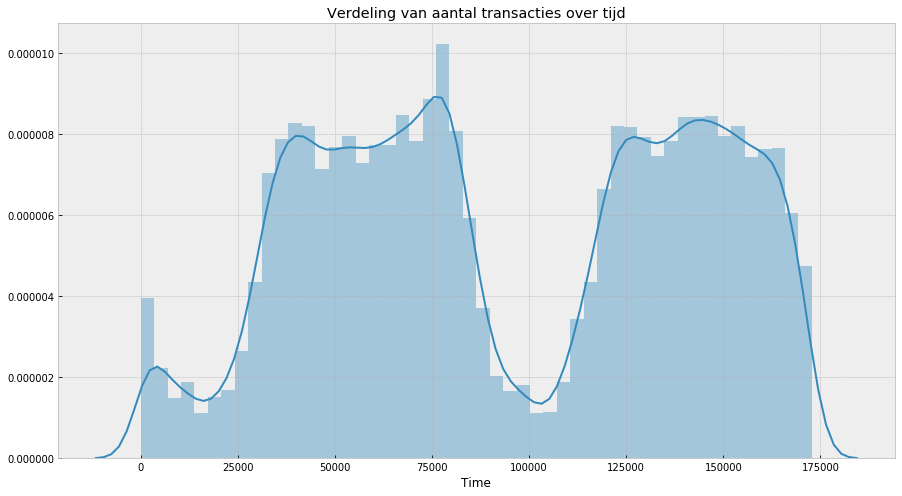

In [9]:
plt.style.use('bmh')
plt.figure(figsize=(15,8))
plt.title("Verdeling van aantal transacties over tijd")
sns.distplot(df['Time'])

### Waardes van de transactie

Ook de transacties laten een voorspelbaar patroon zien. Het minimum bedrag is 0,00 en de gemiddelde transactie heeft een waarde van 88,35. Het gehele gewicht van de dataset ligt bij transacties met een relatief beperkt waarde. Het 99ste percentiel kent een waarde van iets meer dan 1.000 voor een transactie. De maximum waarde ligt op 25.691 voor een transactie. De munteenheid is niet vermeld, waardoor het niet mogelijk is om in te schatten of het om een hoog bedrag gaat of niet.

In het volgende onderdeel wordt ook de waarde van de transactie genormaliseerd. Normaliter zou het ook slim zijn om de outliers eruit te halen. Maar omdat het aannemelijk is dat fraudeurs zoveel mogelijk willen verdienen aan hun misdaad, nemen we de outliers toch mee in de dataset.

In [10]:
df['Amount'].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).round(5)

count    284807.00000
mean         88.34962
std         250.12011
min           0.00000
1%            0.12000
5%            0.92000
25%           5.60000
50%          22.00000
75%          77.16500
95%         365.00000
99%        1017.97000
max       25691.16000
Name: Amount, dtype: float64

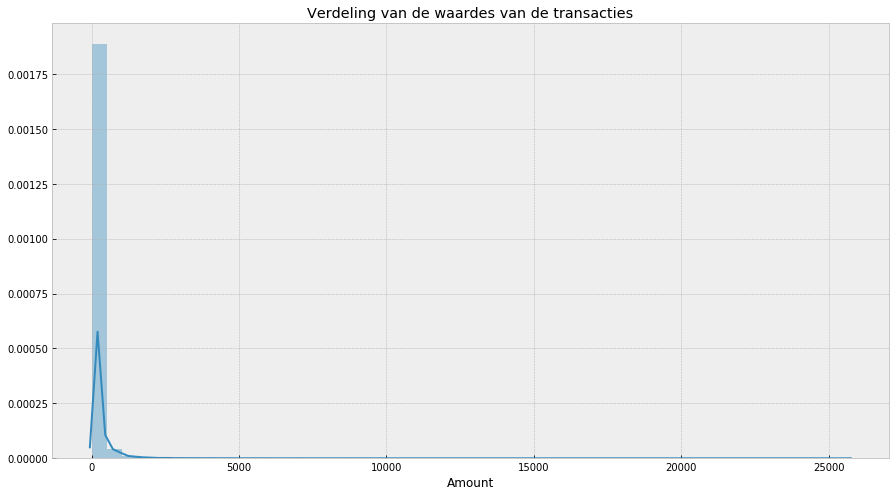

In [11]:
plt.figure(figsize=(15,8))
plt.title("Verdeling van de waardes van de transacties")
sns.distplot(df['Amount'])

### Correlatiematrix

Tot slot willen we een inzicht hebben in de onderlinge verbanden tussen de variabelen van onze dataset. Hiervoor stellen we een correlatiematrix op in de vorm van een zogenaamde *heatmap*. Deze geeft - wanneer je veel variabelen hebt - snel de verbanden inzichtelijk weer door middel van kleuren, in plaats van getallen.

De heatmap geeft goed het effect van PCA weer. PCA combineert bestaande variabelen die een bepaalde mate van correlatie met elkaar hebben tot een kleiner aantal nieuwe variabelen. Omdat bestaande gecorreleerde variabelen met elkaar worden gecombineerd, zal er minder correlatie tussen de PCA variabelen zijn.

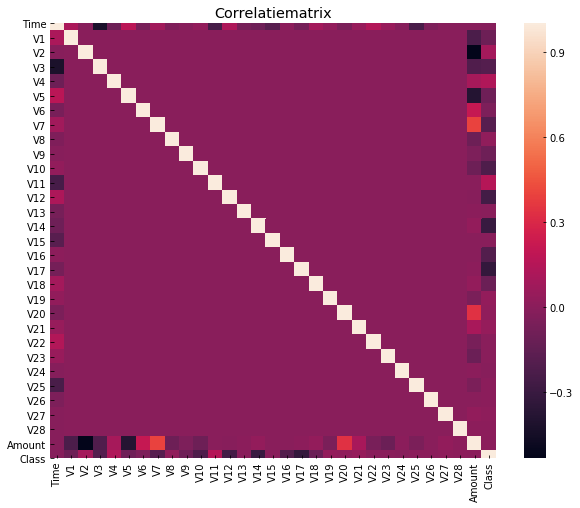

In [12]:
plt.figure(figsize=(10,8))
plt.title('Correlatiematrix')
sns.heatmap(df.corr())

## Data cleaning / processing

In dit onderdeel zullen we een tweetal acties verrichten, die het neurale netwerk moeten helpen om de zo goed mogelijk de transacties te classificeren:
1. Het schalen van de variabelen Time en Amount
2. Undersampling en oversampling

### Time en Amount standaardiseren

Zoals aangegeven zijn dit de enige variabelen in de dataset die daadwerkelijk betekenis hebben voor het menselijke oog. De waardes lopen sterk uiteen; van 0 tot ongeveer 26.000 voor transacties en van 0 tot 172.800 voor tijd. 

Deze variabelen gaan we schalen, zodat ze een gemiddelde waarde van 0,00 hebben en een standaardafwijking van 1,00. Dit wordt ook wel unit-variance genoemd. Waarom doen we dit? Algoritmes leren efficiënter wanneer alle variabelen op een gelijke schaal liggen. De exacte uitleg vind je in __[dit filmpje](https://www.youtube.com/watch?v=FDCfw-YqWTE)__ .

We kunnen de variabelenechter pas standaardiseren nadat we onze dataset in een train-set, cv-set en test-set.

### Undersampling en oversampling

De twee genoemde processen moeten het probleem van onbalans in de dataset oplossen. We willen namelijk niet dat het algoritme 99.83% nauwkeurigheid behaalt door elke transactie als niet-frauduleus te classificeren. Daarom passen we - los van elkaar - twee technieken toe die dit probleem tegen proberen te gaan.

#### Undersampling

Op dit moment staan er tegenover de 492 frauduleuze transacties meer dan 284.000 niet-frauduleuze transacties. Bij undersampling pas je de dataset waar je op traint bewust aan. 

Je begint met het verdelen van je dataset in drie sub-sets:
* Train set (90%)
* Cross-validation set (5%)
* Test set (5%)

Bij undersampling halen gebruiken we een groot aantal van de niet-frauduleuze transacties uit de training dataset. Het voordeel hiervan is dat het algoritme geen goede score kan behalen als het alle transacties als niet-frauduleus classificeert. Er kleeft echter ook een nadeel aan deze techniek; er gaat namelijk een hoop informatie verloren die in de normale transacties zit.

Verricht deze handeling alleen op de train set, we willen namelijk dat de verdeling van de set waar we ons algoritme mee beoordelen zo dicht mogelijk bij de werkelijkheid is. Zouden we deze datasets toch aanpassen, dan zal een beoordeling praktisch waardeloos zijn. 

Welke verhouding tussen frauduleuze transacties en niet-frauduleuze transacties aangehouden moet worden, is een proces van trial en error. In eerste instantie zijn we begonnen met een verhouding van 1:1. Dit houdt in dat voor elke frauduleuze transactie er één niet-frauduleuze transactie in de training dataset zit.

Na een aantal iteraties kwamen we erachter dat een verhouding van 1:1,5 het best werkt voor deze dataset. Dat houdt dus in dat voor elke frauduleuze transactie er 1,5 niet-frauduleuze transacties in de training dataset zit.

Om sneller te itereren, hebben we het opstellen van een dataset op basis van undersampling gebouwd in een functie. Het zet een DataFrame om in nieuwe datasets voor training, cross validation en testing in de gewenste verhoudingen. Deze functie standardiseert tevens de tijd en waarde van de transactie.

De functie inclusief documentatie is aan het einde van deze case te vinden. Omwille van het overzicht gaan we daar nu niet dieper op in.

In [13]:
x_train_us, y_train_us, x_cv_us, y_cv_us, x_test_us, y_test_us, metrics_dict_us = split_and_scale_undersample(df, balance_ratio=1.5, cv_ratio=0.05, test_ratio=0.05)

metrics_dict_us

{'Total number of records': 284807,
 'Total number of fraud records': 492,
 'Number of independent variables': 30,
 'Total number of records in train': 1125,
 'Total number of fraud records in train': 450,
 'Number of independent variables in train': 30,
 'Total number of records in cv': 14241,
 'Total number of fraud records in cv': 21,
 'Number of independent variables in cv': 30,
 'Total number of records in test': 14241,
 'Total number of fraud records in test': 21,
 'Number of independent variables in test': 30}

### Oversampling

Het tegenovergestelde van undersampling is oversampling: we gaan meer fraudeleuze transacties creëren. De eenvoudigste manier zou zijn om gewoon kopieën aan onze set toe te voegen. Deze manier van oversampling is echter gevoelig voor overfitting. Er bestaat ook een manier om betere resultaten te behalen door middel van Synthetic Minority Over-sampling Technique, beter bekend als SMOTE. 

Het resultaat is dat er nu 227.465 frauduleuze transacties in training set te vinden zijn. Het aantal frauduleuze transacties in de cross-validation set en test set zijn ongewijzigd, gezien we een zo realistisch mogelijk verdeling willen hebben.

In [24]:
x_train_os, y_train_os, x_cv_os, y_cv_os, x_test_os, y_test_os, metrics_dict_os = split_and_scale_oversample(df)

metrics_dict_os

{'Total number of records': 284807,
 'Total number of fraud records': 492,
 'Number of independent variables': 30,
 'Total number of records in train': 454930,
 'Total number of fraud records in train': 227465,
 'Number of independent variables in train': 30,
 'Total number of records in cv': 28481,
 'Total number of fraud records in cv': 66,
 'Number of independent variables in cv': 30,
 'Total number of records in test': 28481,
 'Total number of fraud records in test': 46,
 'Number of independent variables in test': 30}

## Prototype model

Voor we in dit onderdeel een relatief eenvoudig neuraal netwerk bouwen om de creditcardfraude op te kunnen sporen, moeten we eerst maatstaf voor prestatie opstellen. Wat in het geval van deze use case het meest aannemelijk is, is om te kijken naar de Precision-recall curve en de average precision score (AP) te meten. Waarom we voor deze maatstaf kiezen, leggen we uit direct nadat we het eerste model op hebben gesteld.

### Een eenvoudig neuraal netwerk

We beginnen met een simpel netwerk om zicht te krijgen op de potentie van onze dataset en een mogelijk model, voor we meer complexe modellen bouwen.

Om snel een functioneel model te krijgen, maken we gebruik van het Keras framework. Hierin bouwen we een netwerk met een enkele verborgen laag van 32 knooppunten en een outputlaag van 1 knooppunt. Deze laatste laag geeft aan wat de waarschijnlijkheid van een hit is. We trainen het model voor 10 iteraties. 

In [88]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

In [178]:
model = Sequential([
    Dense(32, activation=relu),
    Dense(1, activation=sigmoid)
])

In [179]:
model.compile(optimizer=Adam(), loss=binary_crossentropy)

model.fit(
    x_train_os, y_train_os, 
    epochs=5, batch_size=64, 
    verbose=1,
)

Train on 454930 samples
Epoch 1/5
454930/454930 [==============================] - 15s 32us/sample - loss: 0.0563
Epoch 2/5
454930/454930 [==============================] - 13s 29us/sample - loss: 0.0133
Epoch 3/5
454930/454930 [==============================] - 13s 29us/sample - loss: 0.0079
Epoch 4/5
454930/454930 [==============================] - 12s 27us/sample - loss: 0.0057
Epoch 5/5
454930/454930 [==============================] - 15s 33us/sample - loss: 0.0045


### Prestatie maatstaf

Om het model te beoordelen, kijken we naar de precision-recall curve en de average precision score. De precision-recall curve zet de nauwkeurigheid van de classificatie af tegen de gevoeligheid van het model. 

Precisie houdt in dat we kijken naar de hoeveel correct gekozen positieve classificaties. Dus hoeveel van de fraude classificaties die het model maakt, zijn nu ook daadwerkelijk fraude. Dit bereken je als volgt:

$$Precision=\frac{True Positives}{True Positives + False Positives}$$
<br>

Recall geeft aan hoe gevoelig het model is. Dit vertaalt zich naar hoeveel van alle frauduleuze transacties het model in staat was te herkennen:

$$Recall=\frac{True Positives}{True Positives + False Negatives}$$
<br>

Een goed model maximalizeert de gevoeligheid, zonder veel aan precisie in te boeten. Oftewel, een goed model herkent zoveel mogelijk frauduleuze transacties, zonder fouten te maken in de classificatie. 

__[Dit artikel](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)__ van Jason Brownlee gaat dieper in op waarom de precision-recall curve een geschikte tool is om modellen te beoordelen die op onevenwichtige datasets zijn gebouwd.

#### Precision-recall trade-off
Uit bovenstaande uitleg valt te concluderen dat er een trade-off zit tussen precisie en recall. Dat betekent dat je als gebruiker een keuze moet maken tussen de gevoeligheid en precisie van het model. Het een gaat ten koste van het ander. Aan de ene kant kan het model zoveel mogelijk frauduleuze transacties proberen te herkennen en meer false positives te genereren. Aan de andere kant kan het model een hoge mate van precisie bereiken, door enkel een transactie te classificeren als frauduleus als het heel zeker is van zijn zaak. In het laatste geval betekent dat dat er een hoop transacties van twijfelachtige aard genegeerd worden.

Sensitieve modellen worden verkozen wanneer we absoluut geen signaal mogen missen, bijvoorbeeld wanneer we een scan controleren op mogelijk kwaadaardige tumren bij een patiënt.

Preciese modellen werken goed wanneer men zeker moet zijn als er een keuze gemaakt wordt, bijvoorbeeld voor een algoritme dat aandelen verhandeld op de beurs naar aanleiding van nieuwsberichten.

Of recall of precisie voorrang heeft in de creditcardfraude use case, laten we voor nu in het midden. Het is onze taak om de verhouding te maximalizeren, ongeacht waar de eindgebruiker voorrang aan geeft. Dit vatten we in de average precision score (AP), die de gemiddelde precisie weergeeft over meerdere recall scenario's.

We bouwen het opstellen van de prestatiemaatstaf in een functie, zodat we deze voor latere modellen weer kunnen gebruiken met slechts een regel.

In ons eenvoudig model bereiken we AP van 0,81 op de cross-validation dataset.

In [166]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [185]:
def model_target_metrics(model, x_train, y_train, x_cv, y_cv):
    #bouw de precision-recall curve en AP voor de train dataset.
    y_hat_prob_train = model.predict(x_train)
    precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_hat_prob_train)
    aps_train = average_precision_score(y_train, y_hat_prob_train)
    
    #bouw de precision-recall curve en AP voor de cv dataset.
    y_hat_prob_cv = model.predict(x_cv)
    precision_cv, recall_cv, thresholds_cv = precision_recall_curve(y_cv, y_hat_prob_cv)
    aps_cv = average_precision_score(y_cv, y_hat_prob_cv)
    
    #print de AP uitkomsten en stel grafiek op met zowel de train als de cv precision recall curve
    print("Average precision score op train set voor model getrained op oversampled training set is {}.".format(aps_train.round(4)))
    print("Average precision score op cross-validation set voor model getrained op oversampled training set is {}\n.".format(aps_cv.round(4)))

    plt.figure(figsize=(15,8))
    plt.plot(recall_train, precision_train, color='darkorange',
             lw=2, label='Train Precision recall curve')
    plt.plot(recall_cv, precision_cv, color='darkblue',
         lw=2, label='Cross-Val Precision recall curve')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-recall curve')
    plt.legend(loc="lower left")
    plt.show()


Average precision score op train set voor model getrained op oversampled training set is 0.9999.
Average precision score op cross-validation set voor model getrained op oversampled training set is 0.8105
.


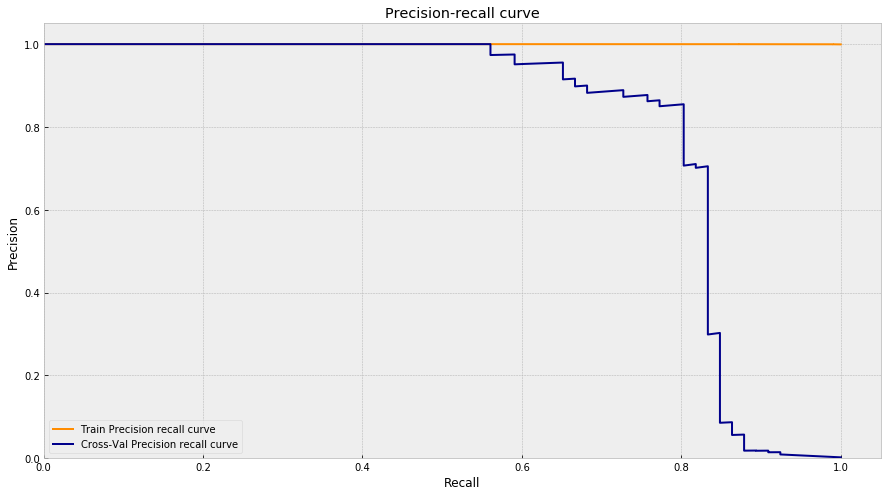

In [186]:
model_target_metrics(model, x_train_os, y_train_os, x_cv_os, y_cv_os)

## Optimaal model

Het vinden van een optimaal model is een iteratief proces met een hoog empirisch karakter. Voor deze use case proberen we een tweetal modellen:
* Model met meer lagen
* Model met meer knooppunten per laag

Om het vinden van het optimale model makkelijker te maken, bouwen we een checkpoint in in ons model dat na elke iteratie bijhoudt wat de AP is. Vervolgens vergelijkt het deze nieuwe AP met eerdere scores en slaat het best presterende model op. 

### Model met meer lagen

Meer lagen staan complexere verbanden toe. Zoals je hier beneden ziet, daalt de AP score. Dit betekent dat we het model overfitten op de train data. 

In [181]:
model_multi_layer = Sequential([
    Dense(32, activation=relu),
    Dense(32, activation=relu),
    Dense(32, activation=relu),
    Dense(1, activation=sigmoid)
])

model_multi_layer.compile(optimizer=Adam(), loss=binary_crossentropy)

model_multi_layer.fit(
    x_train_os, y_train_os, 
    epochs=10, batch_size=64, 
    verbose=1,
)

Train on 454930 samples
Epoch 1/10
454930/454930 [==============================] - 16s 35us/sample - loss: 0.0196
Epoch 2/10
454930/454930 [==============================] - 16s 34us/sample - loss: 0.0048
Epoch 3/10
454930/454930 [==============================] - 17s 37us/sample - loss: 0.0035
Epoch 4/10
454930/454930 [==============================] - 14s 31us/sample - loss: 0.0030
Epoch 5/10
454930/454930 [==============================] - 15s 33us/sample - loss: 0.0026
Epoch 6/10
454930/454930 [==============================] - 15s 32us/sample - loss: 0.0024
Epoch 7/10
454930/454930 [==============================] - 14s 31us/sample - loss: 0.0021
Epoch 8/10
454930/454930 [==============================] - 14s 32us/sample - loss: 0.0019
Epoch 9/10
454930/454930 [==============================] - 15s 33us/sample - loss: 0.0018
Epoch 10/10
454930/454930 [==============================] - 15s 34us/sample - loss: 0.0017


Average precision score op train set voor model getrained op oversampled training set is 1.0.
Average precision score op cross-validation set voor model getrained op oversampled training set is 0.7899
.


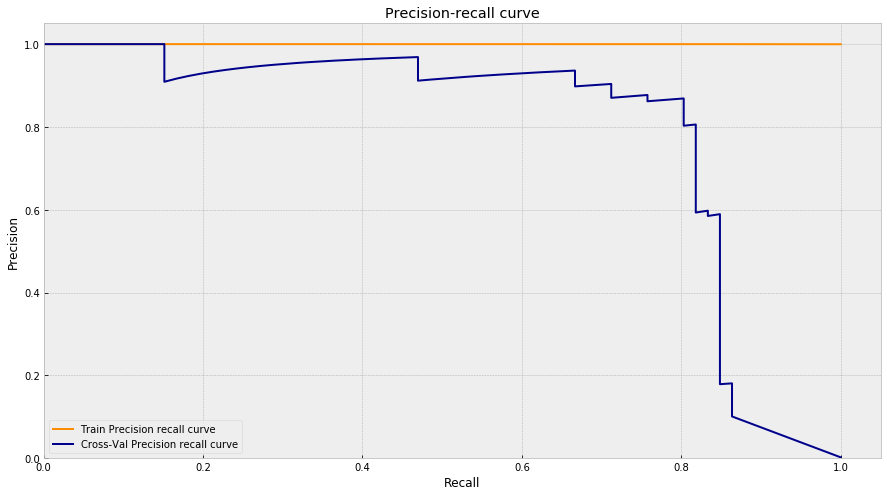

In [187]:
model_target_metrics(model_multi_layer, x_train_os, y_train_os, x_cv_os, y_cv_os)

Om het overfitten tegen te gaan passen we een regularization techniek toe, genaamd dropout. Deze laat willekeurig een aangegeven percentage van de knooppunten in het netwerk uitvallen per iteratie, zodat het netwerk niet te afhankelijk wordt van een paar punten. 

Wat dropout precies is, wordt goed uitgelegd door Andrew Ng in __[dit filmpje](https://www.youtube.com/watch?v=D8PJAL-MZv8)__.

We bouwen nog een keer exact hetzelfde netwerk, maar nu met een Dropout toegepast op elke laag.

In [198]:
from tensorflow.keras.layers import Dropout

model_multi_layer_dropout = Sequential([
    Dense(32, activation=relu),
    Dropout(0.5),
    Dense(32, activation=relu),
    Dropout(0.5),
    Dense(32, activation=relu),
    Dropout(0.5),
    Dense(1, activation=sigmoid)
])

model_multi_layer_dropout.compile(optimizer=Adam(), loss=binary_crossentropy)

model_multi_layer_dropout.fit(
    x_train_os, y_train_os, 
    epochs=10, batch_size=64, 
    verbose=1,
)

Train on 454930 samples
Epoch 1/10
454930/454930 [==============================] - 19s 42us/sample - loss: 0.1002
Epoch 2/10
454930/454930 [==============================] - 17s 38us/sample - loss: 0.0379
Epoch 3/10
454930/454930 [==============================] - 17s 37us/sample - loss: 0.0327
Epoch 4/10
454930/454930 [==============================] - 18s 39us/sample - loss: 0.0292
Epoch 5/10
454930/454930 [==============================] - 16s 36us/sample - loss: 0.0281
Epoch 6/10
454930/454930 [==============================] - 17s 37us/sample - loss: 0.0266
Epoch 7/10
454930/454930 [==============================] - 20s 44us/sample - loss: 0.0254
Epoch 8/10
454930/454930 [==============================] - 17s 38us/sample - loss: 0.0248
Epoch 9/10
454930/454930 [==============================] - 25s 54us/sample - loss: 0.0241s - loss: 0.024 
Epoch 10/10
454930/454930 [==============================] - 17s 37us/sample - loss: 0.0234


Average precision score op train set voor model getrained op oversampled training set is 0.9997.
Average precision score op cross-validation set voor model getrained op oversampled training set is 0.7889
.


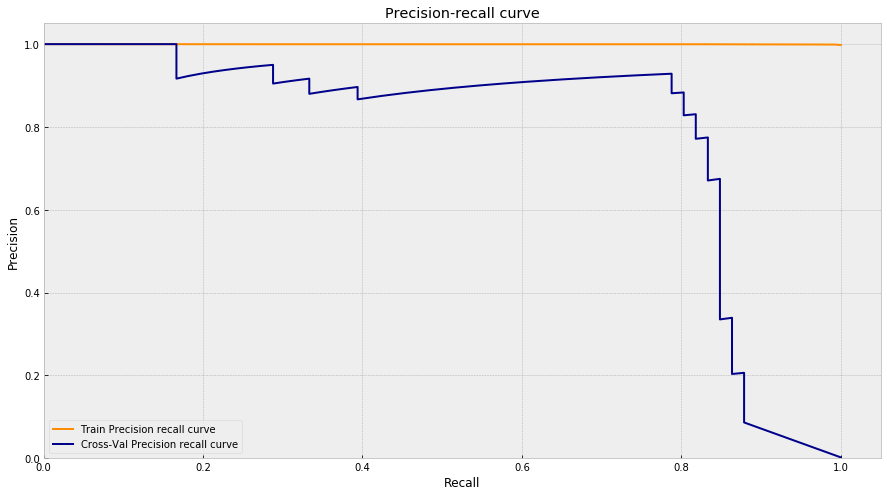

In [199]:
model_target_metrics(model_multi_layer_dropout, x_train_os, y_train_os, x_cv_os, y_cv_os)

### Model met meer knooppunten per laag

Meer lagen staan complexere verbanden toe. Zoals je hier beneden ziet, daalt de AP score. Dit betekent dat we het model overfitten op de train data. 

In [200]:
model_more_nodes = Sequential([
    Dense(128, activation=relu),
    Dense(1, activation=sigmoid)
])

model_more_nodes.compile(optimizer=Adam(), loss=binary_crossentropy)

model_more_nodes.fit(
    x_train_os, y_train_os, 
    epochs=10, batch_size=64, 
    verbose=1,
)

Train on 454930 samples
Epoch 1/10
454930/454930 [==============================] - 13s 28us/sample - loss: 0.0262
Epoch 2/10
454930/454930 [==============================] - 12s 27us/sample - loss: 0.0051
Epoch 3/10
454930/454930 [==============================] - 13s 28us/sample - loss: 0.0031
Epoch 4/10
454930/454930 [==============================] - 12s 27us/sample - loss: 0.0024s - 
Epoch 5/10
454930/454930 [==============================] - 13s 28us/sample - loss: 0.0019
Epoch 6/10
454930/454930 [==============================] - 15s 34us/sample - loss: 0.0018
Epoch 7/10
454930/454930 [==============================] - 13s 29us/sample - loss: 0.0015
Epoch 8/10
454930/454930 [==============================] - 15s 33us/sample - loss: 0.0013
Epoch 9/10
454930/454930 [==============================] - 13s 29us/sample - loss: 0.0012
Epoch 10/10
454930/454930 [==============================] - 16s 36us/sample - loss: 0.0011


Average precision score op train set voor model getrained op oversampled training set is 1.0.
Average precision score op cross-validation set voor model getrained op oversampled training set is 0.7974
.


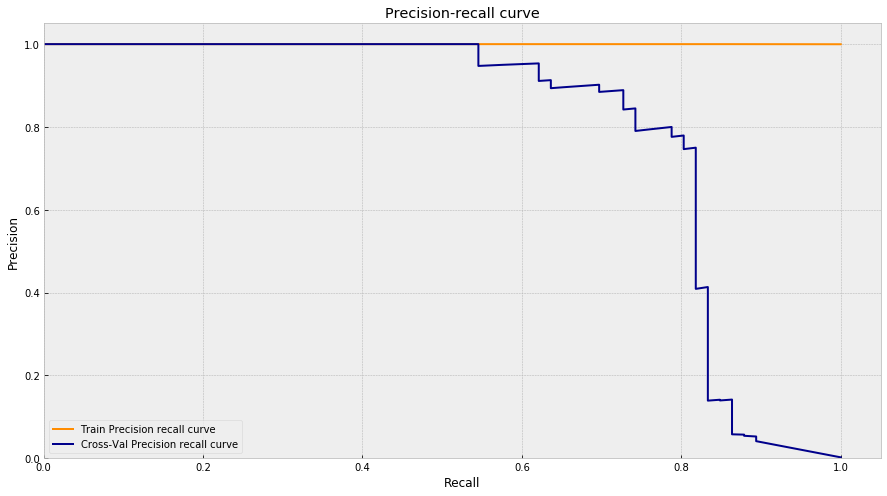

In [201]:
model_target_metrics(model_more_nodes, x_train_os, y_train_os, x_cv_os, y_cv_os)

## Conclusie

Deze creditcardfraude use case benadert wat je in de echte wereld tegen kunt komen, op het gebied van ongebalanceerde datasets. We beschikken over slechts twee dagen aan transacties, waardoor we snel 'overfitten' op de trainingdata en de prestaties op ongeziene data achter blijven. 

In de praktijk zul je vaak zien - net zoals hierboven ook blijkt - dat het model misschien niet altijd even complex hoeft te zijn en dat daar ook slechts een klein deel van de tijd gaat zitten. Het merendeel van de tijd gaat zitten in het doorgronden van het probleem en het voorbereiden van de data. 

## Appendix

Hier beneden vind je de twee functies die het DataFrame omzetten in gescheiden datasets voor training, cross-validation en testing. De eerste functie stelt je in staat om undersampling in een gewenste ratio eenvoudig uit te voeren, waarbij de tweede functie dat voor oversampling doet. 

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def split_and_scale_undersample(df, balance_ratio=1, cv_ratio=0.1, test_ratio=0.1):
    '''
    split_and_scale_undersample performs two tasks.

    Firstly it transforms a unbalanced dataframe to three subsets. A train set, 
    of which the balancing between positive and negative has been altered for train purposes.
    This is done by using undersampling the training set.
    The cv and test set maintain the original distribution.

    Secondly, it scales the variables Amount and Time, by using a standard scaler. The scaler is fitted
    on the train set and applied on the cv and test set.

    Input arguments:
    1. df - (pd DataFrame)|the original dataframe as a whole, without any data manipulation done
    2. balance_ratio - (float)|desired ratio between number of fraud cases and non-fraud cases

    Output variables:
    1. x_train - (np array)|independent variables in desired balance ratio of fraud to non-fraud cases
    2. y_train - (np array)|classification of fraud/non-fraud in desired balance ratio
    3. x_cv - (np array)|cross validation dependent variables with original distribution
    4. y_cv - (np array)|cross validation classification of fraud/non-fraud with original distribution
    5. x_test - (np array)|test dependent variables with original distribution
    6. y_test - (np array)|test validation classification of fraud/non-fraud with original distribution

    7. metrics_dict - (dict)|metrics on set sizes
    '''

    #declare necessary functions and instantiate StandardScaler for both time and amount
    metrics_dict = {}
    scaler = StandardScaler()

    '''
    SPLITTING
    --------------------------------------------------------------------------------
    '''
    #split dataframe into x and y
    df_x = df.drop('Class', axis=1).copy()
    df_y = df['Class'].copy()

    #split dataframe into train, cv, test
    x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = test_ratio, random_state=42)

    cv_ratio = cv_ratio / (1-test_ratio)
    x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size = cv_ratio, random_state=42)


    '''
    SCALING
    --------------------------------------------------------------------------------
    '''
    #scale Time and Amount variables; fit and transform on train set and drop non-scaled Class and Time.
    x_train[['Time','Amount']] = scaler.fit_transform(x_train[['Time','Amount']])


    #Transform cv and test set and drop non-scaled Class and Time; pandas detects a SettingWithCopyWarning when transformer is applied on x_test, hence create a copy before applying
    #Convert dataframes to numpy, to make them suitable for processing by model
    x_cv[['Time','Amount']] = scaler.transform(x_cv[['Time','Amount']])
    x_cv = x_cv.to_numpy()
    y_cv = y_cv.to_numpy()
    
    #Set copy of x_test to avoid SettingWithCopyWarning from occurring
    x_test = x_test.copy() 
    x_test[['Time','Amount']] = scaler.transform(x_test[['Time','Amount']])
    x_test = x_test.to_numpy()
    y_test = y_test.to_numpy()


    '''
    UNDER-BALANCING
    --------------------------------------------------------------------------------
    '''
    #return the index of fraud transactions in training set. 
    #Use this to create a mask that can be used for x_train and y_train and turn df to numpy arrays
    fraud_index = list(y_train[y_train == 1].index)
    fraud_mask = y_train.index.isin(fraud_index)

    x_train_f = x_train[fraud_mask].to_numpy()
    y_train_f = y_train[fraud_mask].to_numpy()

    x_train_nf = x_train[~fraud_mask].to_numpy()
    y_train_nf = y_train[~fraud_mask].to_numpy()

    #Use permutation to select a random subset of the non-fraud cases
    #Number of records is equal to fraud cases in training set * balance ratio
    permutation_index = list(np.random.permutation(len(x_train_nf)))

    no_records = int(len(y_train_f) * balance_ratio)

    x_train_nf_partial = x_train_nf[permutation_index[:no_records]]
    y_train_nf_partial = y_train_nf[permutation_index[:no_records]]

    x_train = np.concatenate((x_train_f, x_train_nf_partial), axis=0)
    y_train = np.concatenate((y_train_f, y_train_nf_partial), axis=0)

    #Shuffle the train set 
    shuffle_set = list(np.random.permutation(len(y_train)))
    x_train = x_train[shuffle_set]
    y_train = y_train[shuffle_set]


    '''
    DICTIONAIRY VALUES
    --------------------------------------------------------------------------------
    '''
    #Populate dict with important metrics
    metrics_dict["Total number of records"] = len(df)
    metrics_dict["Total number of fraud records"] = len(df[df['Class']==1])
    metrics_dict["Number of independent variables"] = df_x.shape[1]

    metrics_dict["Total number of records in train"] = len(x_train)
    metrics_dict["Total number of fraud records in train"] = y_train.sum()
    metrics_dict["Number of independent variables in train"] = x_train.shape[1]

    metrics_dict["Total number of records in cv"] = len(x_cv)
    metrics_dict["Total number of fraud records in cv"] = y_cv.sum()
    metrics_dict["Number of independent variables in cv"] = x_cv.shape[1]

    metrics_dict["Total number of records in test"] = len(x_test)
    metrics_dict["Total number of fraud records in test"] = y_test.sum()
    metrics_dict["Number of independent variables in test"] = x_test.shape[1]

    return x_train, y_train, x_cv, y_cv, x_test, y_test, metrics_dict


In [22]:
from imblearn.over_sampling import SMOTE

def split_and_scale_oversample(df, cv_ratio=0.1, test_ratio=0.1):
    '''
    split_and_scale_oversample performs two tasks.

    Firstly it transforms an unbalanced dataframe to three subsets. A train set, 
    of which the balancing between positive and negative has been altered for train purposes.
    This is done by oversampling, using a technique called SMOTE
    The cv and test set maintain the original distribution.

    Secondly, it scales the variables Amount and Time, by using a standard scaler. The scaler is fitted
    on the train set and applied on the cv and test set.

    Input arguments:
    1. df - (pd DataFrame)|the original dataframe as a whole, without any data manipulation done

    Output variables:
    1. x_train - (np array)|independent variables in desired balance ratio of fraud to non-fraud cases
    2. y_train - (np array)|classification of fraud/non-fraud in desired balance ratio
    3. x_cv - (np array)|cross validation dependent variables with original distribution
    4. y_cv - (np array)|cross validation classification of fraud/non-fraud with original distribution
    5. x_test - (np array)|test dependent variables with original distribution
    6. y_test - (np array)|test validation classification of fraud/non-fraud with original distribution

    7. metrics_dict - (dict)|metrics on set sizes
    '''
    
    #declare necessary functions and instantiate StandardScaler for both time and amount
    metrics_dict = {}
    scaler = StandardScaler()
    
    
    '''
    SPLITTING
    --------------------------------------------------------------------------------
    '''
    #split dataframe into x and y
    df_x = df.drop('Class', axis=1).copy()
    df_y = df['Class'].copy()

    #split dataframe into train, cv, test
    x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = test_ratio, random_state=42)

    cv_ratio = cv_ratio / (1-test_ratio)
    x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size = cv_ratio, random_state=42)
    
    
    '''
    SCALING
    --------------------------------------------------------------------------------
    '''
    #scale Time and Amount variables; fit and transform on train set and drop non-scaled Class and Time.
    x_train[['Time','Amount']] = scaler.fit_transform(x_train[['Time','Amount']])


    #Transform cv and test set and drop non-scaled Class and Time; pandas detects a SettingWithCopyWarning when transformer is applied on x_test, hence create a copy before applying
    #Convert dataframes to numpy, to make them suitable for processing by model
    x_cv[['Time','Amount']] = scaler.transform(x_cv[['Time','Amount']])
    x_cv = x_cv.to_numpy()
    y_cv = y_cv.to_numpy()
    
    #Set copy of x_test to avoid SettingWithCopyWarning from occurring
    x_test = x_test.copy() 
    x_test[['Time','Amount']] = scaler.transform(x_test[['Time','Amount']])
    x_test = x_test.to_numpy()
    y_test = y_test.to_numpy()
    
    
    '''
    OVER-BALANCING
    --------------------------------------------------------------------------------
    '''
    smote = SMOTE(random_state=42)
    
    x_train, y_train = x_train.to_numpy(), y_train.to_numpy()
    x_train, y_train = smote.fit_resample(x_train, y_train)
    
    #Shuffle the train set 
    shuffle_set = list(np.random.permutation(len(y_train)))
    x_train = x_train[shuffle_set]
    y_train = y_train[shuffle_set]
    
    
    '''
    DICTIONAIRY VALUES
    --------------------------------------------------------------------------------
    '''
    #Populate dict with important metrics
    metrics_dict["Total number of records"] = len(df)
    metrics_dict["Total number of fraud records"] = len(df[df['Class']==1])
    metrics_dict["Number of independent variables"] = df_x.shape[1]

    metrics_dict["Total number of records in train"] = len(x_train)
    metrics_dict["Total number of fraud records in train"] = y_train.sum()
    metrics_dict["Number of independent variables in train"] = x_train.shape[1]

    metrics_dict["Total number of records in cv"] = len(x_cv)
    metrics_dict["Total number of fraud records in cv"] = y_cv.sum()
    metrics_dict["Number of independent variables in cv"] = x_cv.shape[1]

    metrics_dict["Total number of records in test"] = len(x_test)
    metrics_dict["Total number of fraud records in test"] = y_test.sum()
    metrics_dict["Number of independent variables in test"] = x_test.shape[1]
    
    return x_train, y_train, x_cv, y_cv, x_test, y_test, metrics_dict